## **Dataset Analysis and Visualization**

### **Imports and Dataset Loading**

In [63]:
# Import all necessary libraries
import  numpy               as      np
import  pandas              as      pd 
import  seaborn             as      sb
import  missingno           as      msno
import  matplotlib          as      mpl
import  matplotlib.pyplot   as      plt

# Set high-resolution matplotlib plots
mpl.rcParams['figure.dpi'] = 300

In [64]:
# Load dataset into Pandas dataframes
df_Data = pd.read_csv('Dataset/dataset.csv')                  # Patient disease and symptoms data
df_Desc = pd.read_csv('Dataset/symptom_Description.csv')      # Descriptions of each disease
df_Prec = pd.read_csv('Dataset/symptom_precaution.csv')       # Precautions to take for each disease
df_Sev  = pd.read_csv('Dataset/symptom_severity.csv')         # Severity weight of each symptom

### **Dataset Examples Visualization**

In [65]:
# Show header of patient disease and symptoms data
df_Data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# Show header of disease descriptions
df_Desc.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [67]:
# Show header of disease precautions
df_Prec.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [68]:
# Show header of symptom severity weights
df_Sev.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


**Basic Dataset Statistics**

In [69]:
# Check data types and missing values
print(df_Data.info())  # Check data types & missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB
None


In [70]:
# Get basic statistics for columns
print(df_Data.describe())

                 Disease  Symptom_1  Symptom_2 Symptom_3    Symptom_4  \
count               4920       4920       4920      4920         4572   
unique                41         34         48        54           50   
top     Fungal infection   vomiting   vomiting   fatigue   high_fever   
freq                 120        822        870       726          378   

        Symptom_5 Symptom_6        Symptom_7        Symptom_8  \
count        3714      2934             2268             1944   
unique         38        32               26               21   
top      headache    nausea   abdominal_pain   abdominal_pain   
freq          348       390              264              276   

                 Symptom_9          Symptom_10     Symptom_11 Symptom_12  \
count                 1692                1512           1194        744   
unique                  22                  21             18         11   
top      yellowing_of_eyes   yellowing_of_eyes   irritability    malaise   
freq

### **Disease Targets and Symptom Values**

In [71]:
# For each patient, define Y_disease 'target' and X_symptoms 'value'
Y_disease = df_Data.iloc[:, [0]]
X_symptoms = df_Data.iloc[:, 1:]

In [72]:
# Show header of target array
Y_disease.head()

,Disease
0,Fungal infection
1,Fungal infection
2,Fungal infection
3,Fungal infection
4,Fungal infection


In [73]:
# Show header ov value array (up to 17 symptoms available)
X_symptoms.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Patient Count, Disease and Symptom Frequencies**

In [74]:
# Get number of patients (number of rows in dataset)
patient_count = len(Y_disease.index)
print("Number of Patients: \t\t", patient_count)

# Get array of unique diseases and their frequency
disease_arr = Y_disease['Disease'].value_counts()
print("Number of (Unique) Diseases: \t", len(disease_arr))

# Get array of unique symptoms along with their frequencies
symptom_arr = X_symptoms.melt(value_name="Symptom")["Symptom"].value_counts()
print("Number of (Unique) Symptoms: \t", len(symptom_arr))

# Print disease and symptom array headers
print("\n- Disease Frequencies -\n")
print(disease_arr.head())
print("\n- Symptom Frequencies -\n")
print(symptom_arr.head())

Number of Patients: 		 4920
Number of (Unique) Diseases: 	 41
Number of (Unique) Symptoms: 	 131

- Disease Frequencies -

Disease
Fungal infection       120
Hepatitis C            120
Hepatitis E            120
Alcoholic hepatitis    120
Tuberculosis           120
Name: count, dtype: int64

- Symptom Frequencies -

Symptom
fatigue             1932
vomiting            1914
high_fever          1362
loss_of_appetite    1152
nausea              1146
Name: count, dtype: int64


### **Dataset Plot Visualizations**

**Symptom Frequency**

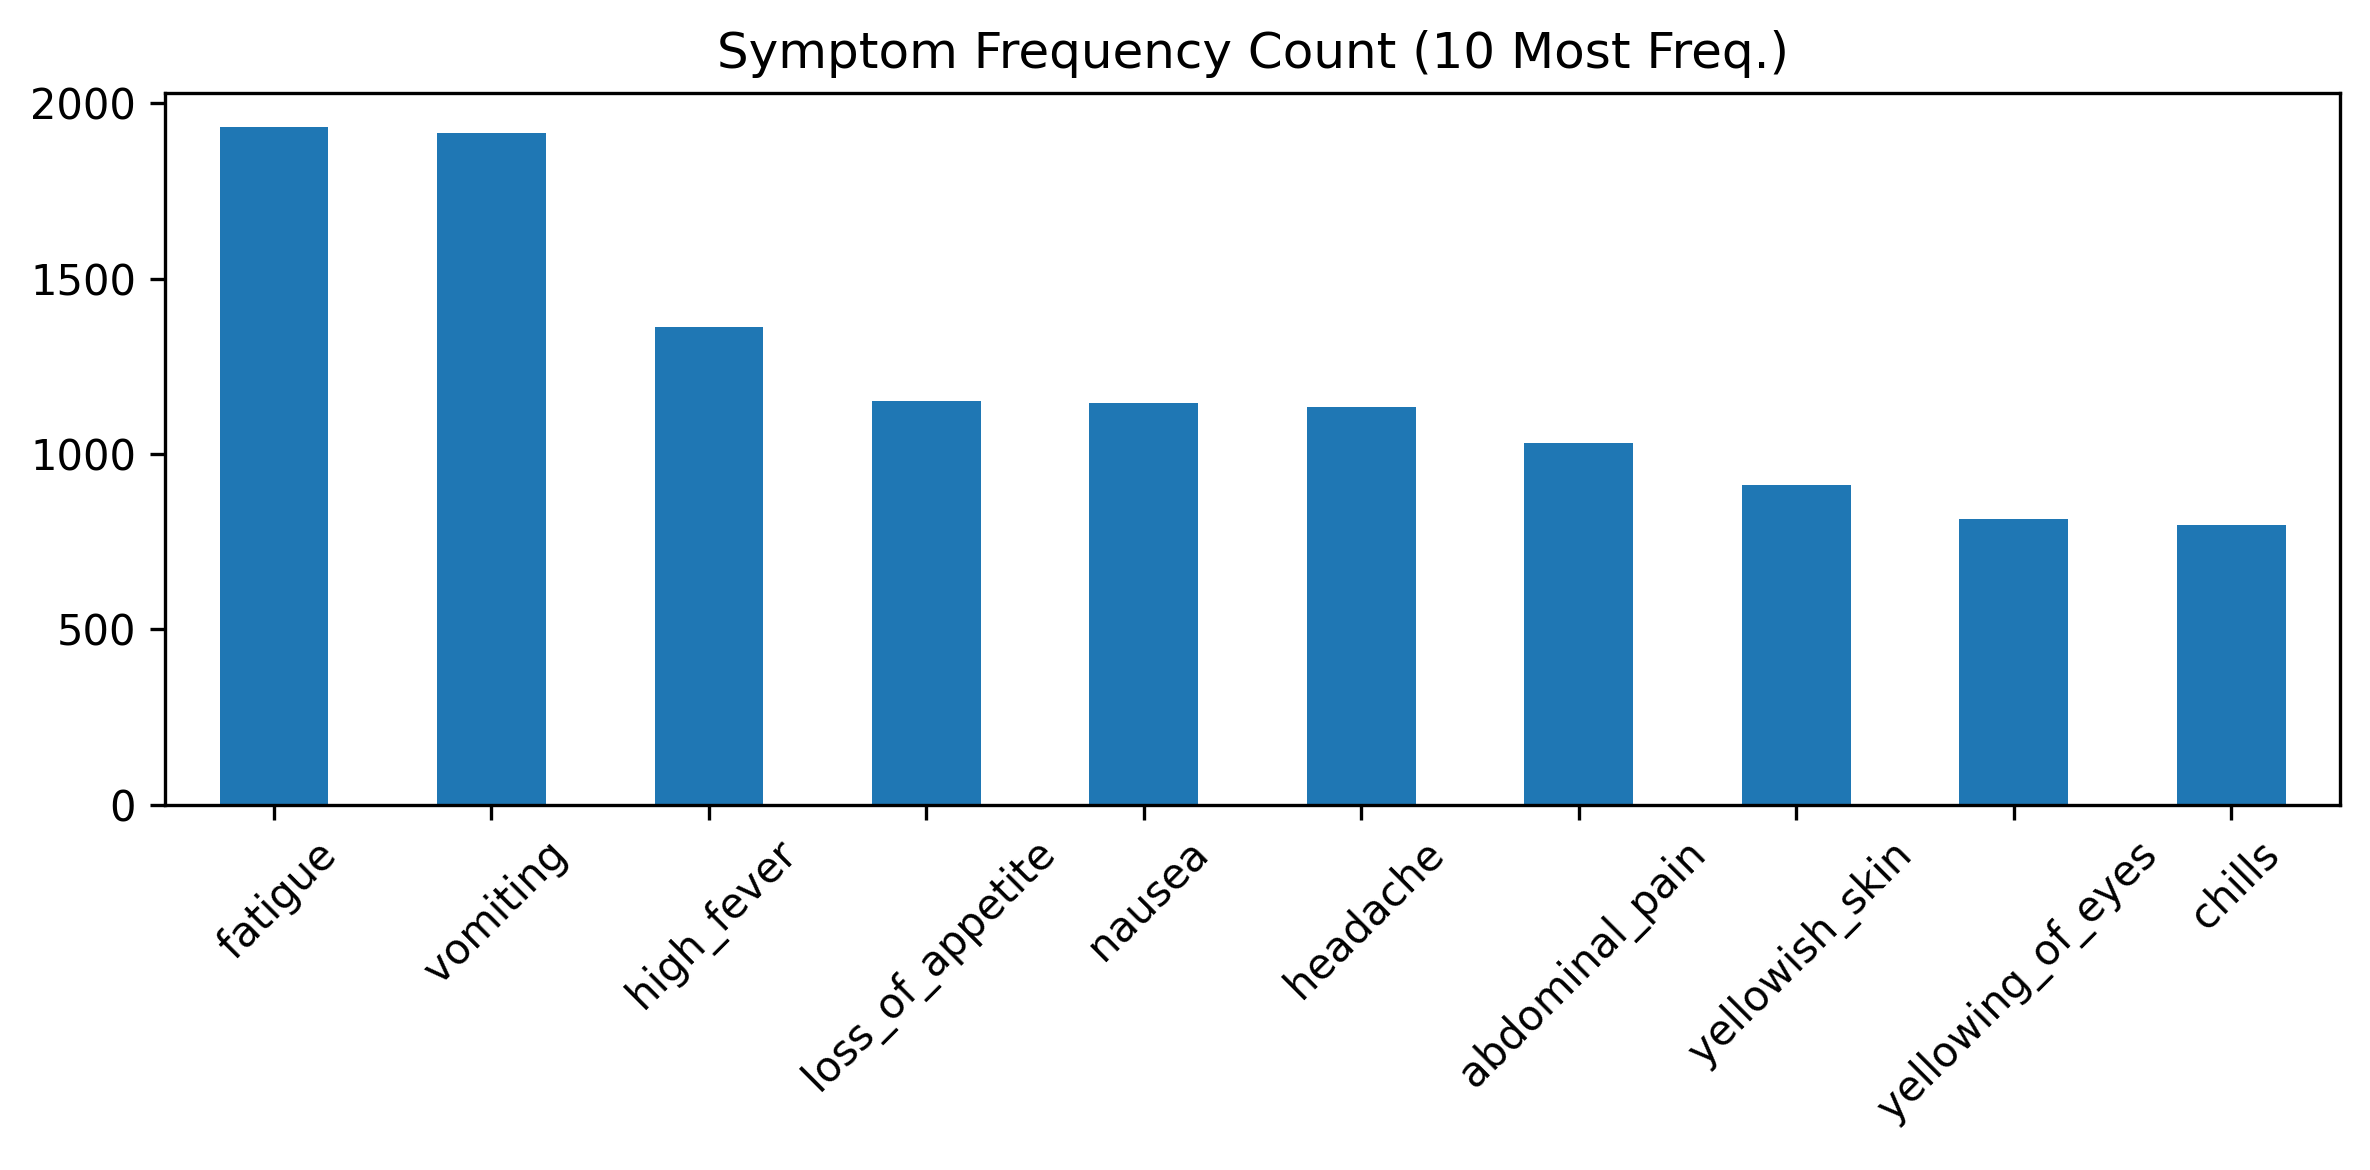

In [75]:
# Bar plot of frequency of each symptom
symptom_arr.head(10).plot(kind = 'bar',
                 title = 'Symptom Frequency Count (10 Most Freq.)',
                 xlabel = "",
                 legend = False,
                 figsize = (8, 4),
                 rot = 45,
                 )
# Save plot
plt.tight_layout()
plt.savefig("./Plots/Visualizations/freq_symptoms_10most.pdf")

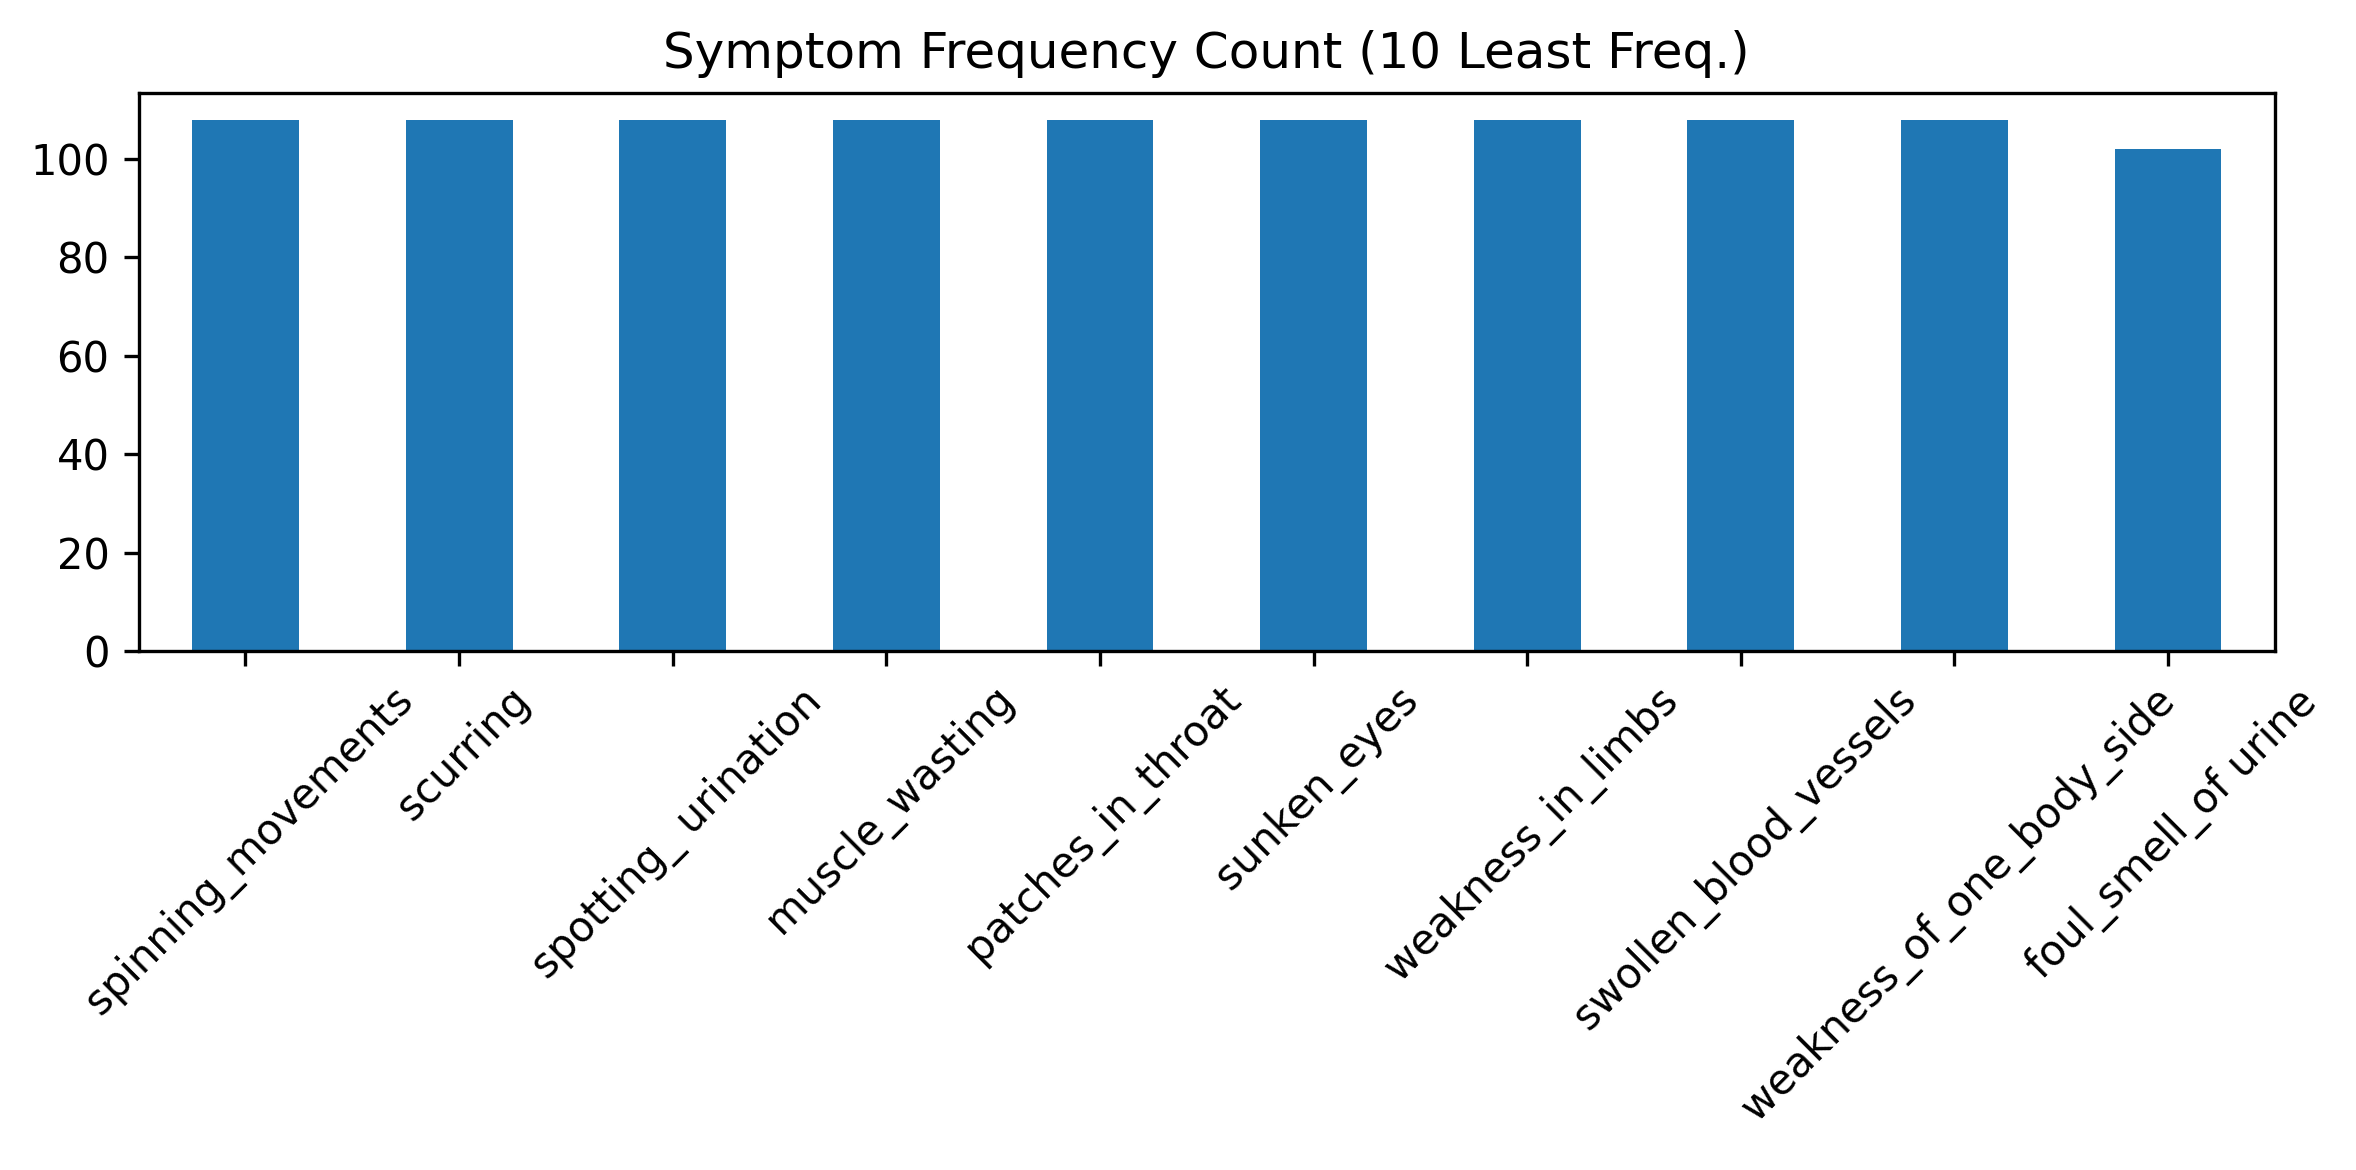

In [76]:
# Bar plot of frequency of each symptom
symptom_arr.tail(10).plot(kind = 'bar',
                 title = 'Symptom Frequency Count (10 Least Freq.)',
                 xlabel = "",
                 legend = False,
                 figsize = (8, 4),
                 rot = 45,
                 )
# Save plot
plt.tight_layout()
plt.savefig("./Plots/Visualizations/freq_symptoms_10least.pdf")

**Disease Frequency**

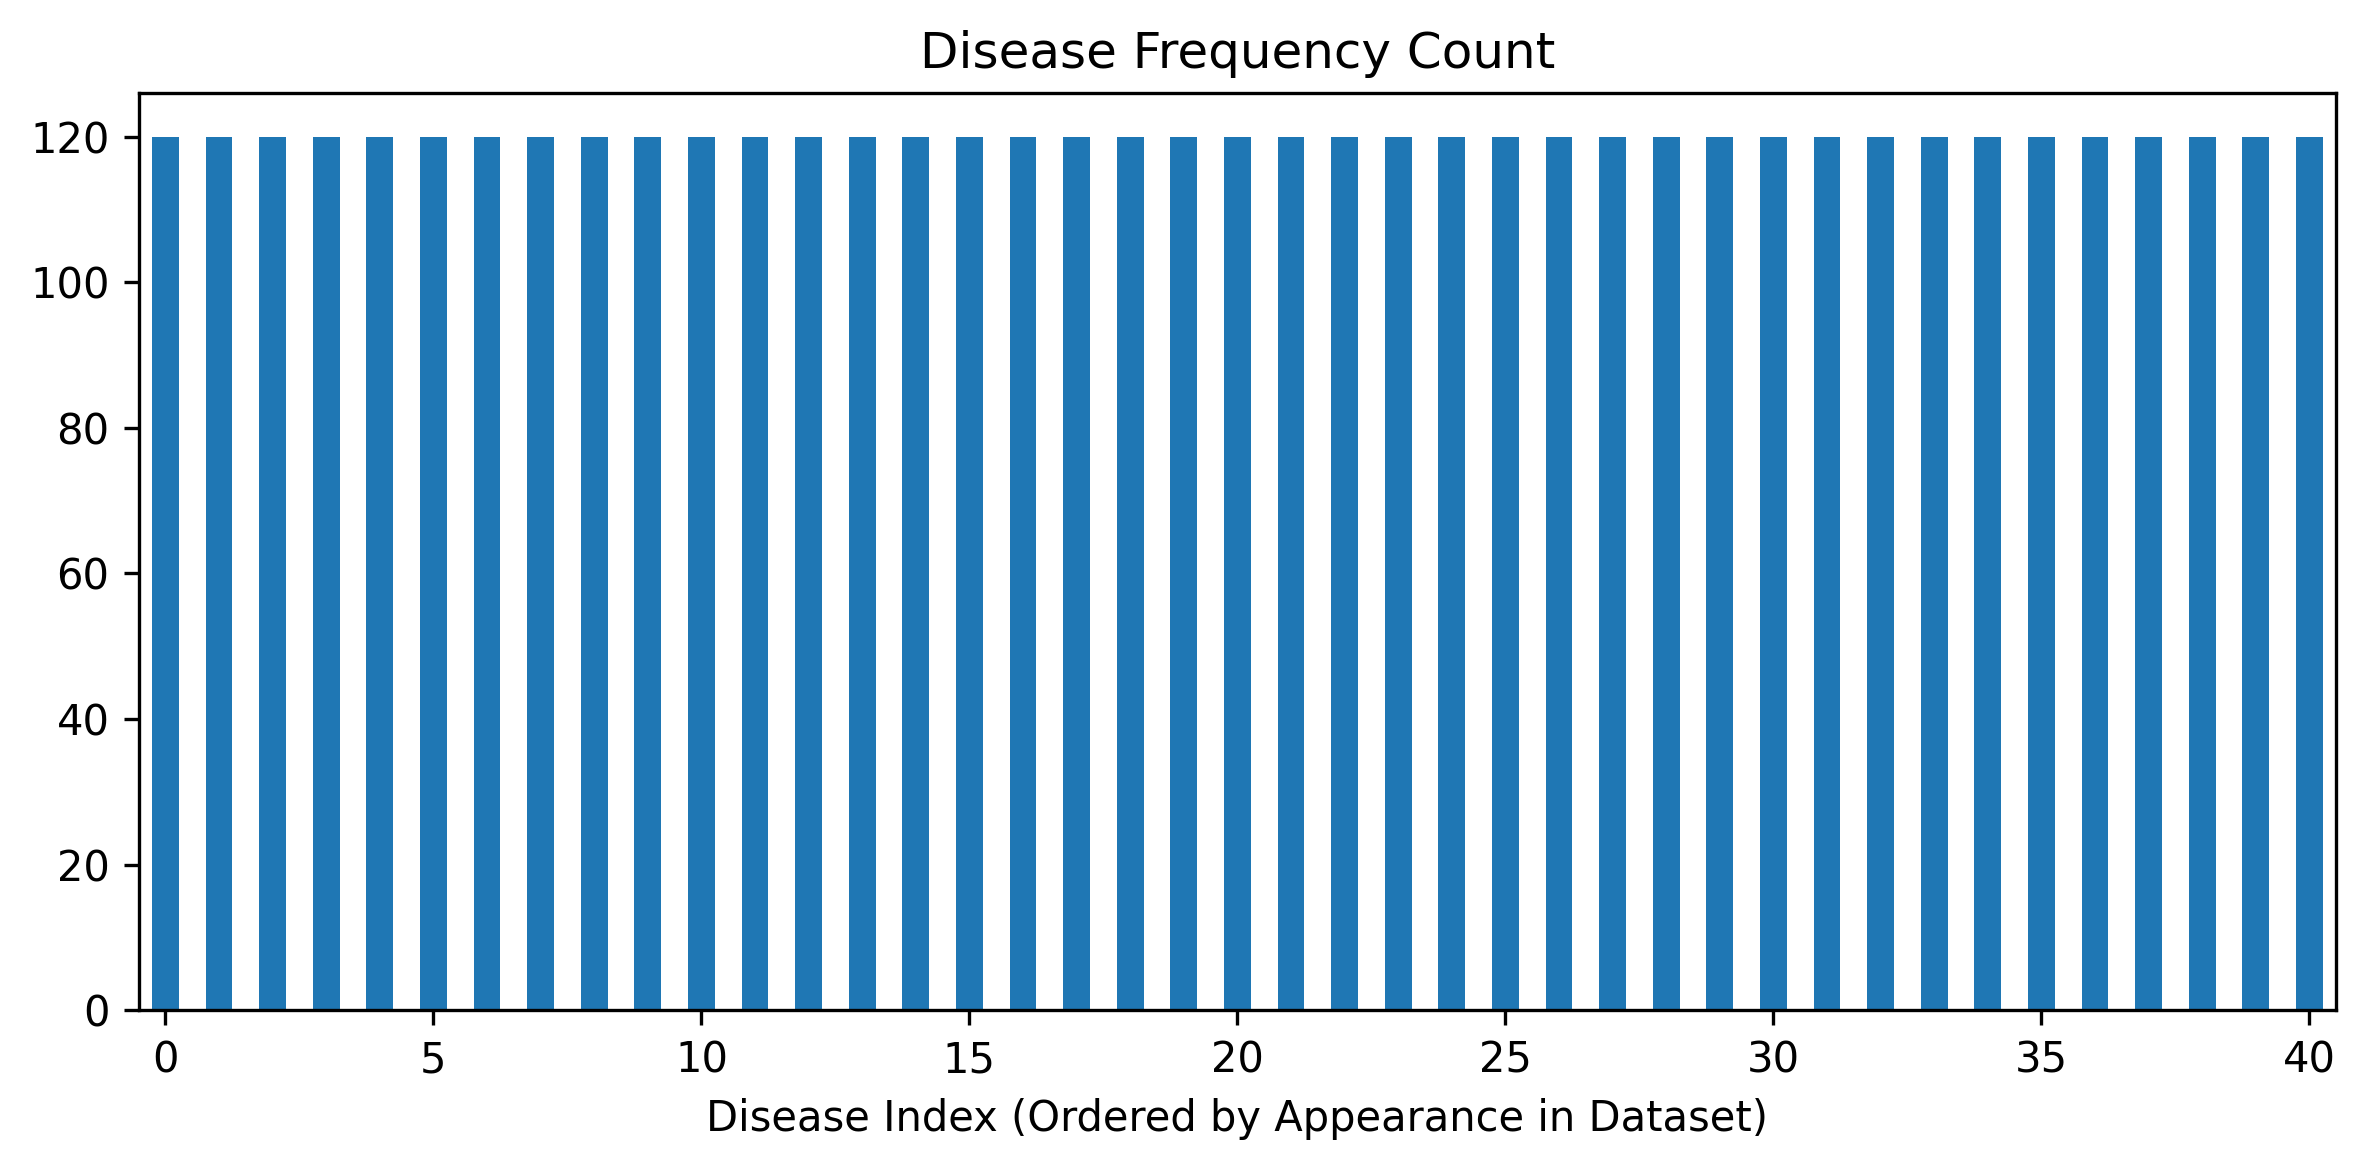

In [77]:
# Bar plot of disease frequency
disease_arr.plot( 
    kind = "bar",
    title = "Disease Frequency Count",
    xlabel = "Disease Index (Ordered by Appearance in Dataset)",
    figsize = (8, 4),
    xticks = range(0, len(disease_arr), 5),
    rot = 0
)
# Save plot
plt.tight_layout()
plt.savefig("./Plots/Visualizations/freq_disease.pdf")

In [78]:
symptom_unique = symptom_arr.sort_values(ascending = False)
print(symptom_unique)

Symptom
fatigue                 1932
vomiting                1914
high_fever              1362
loss_of_appetite        1152
nausea                  1146
                        ... 
blackheads               108
ulcers_on_tongue         108
nodal_skin_eruptions     108
dischromic _patches      108
foul_smell_of urine      102
Name: count, Length: 131, dtype: int64


**Disease Symptom Heatmap**

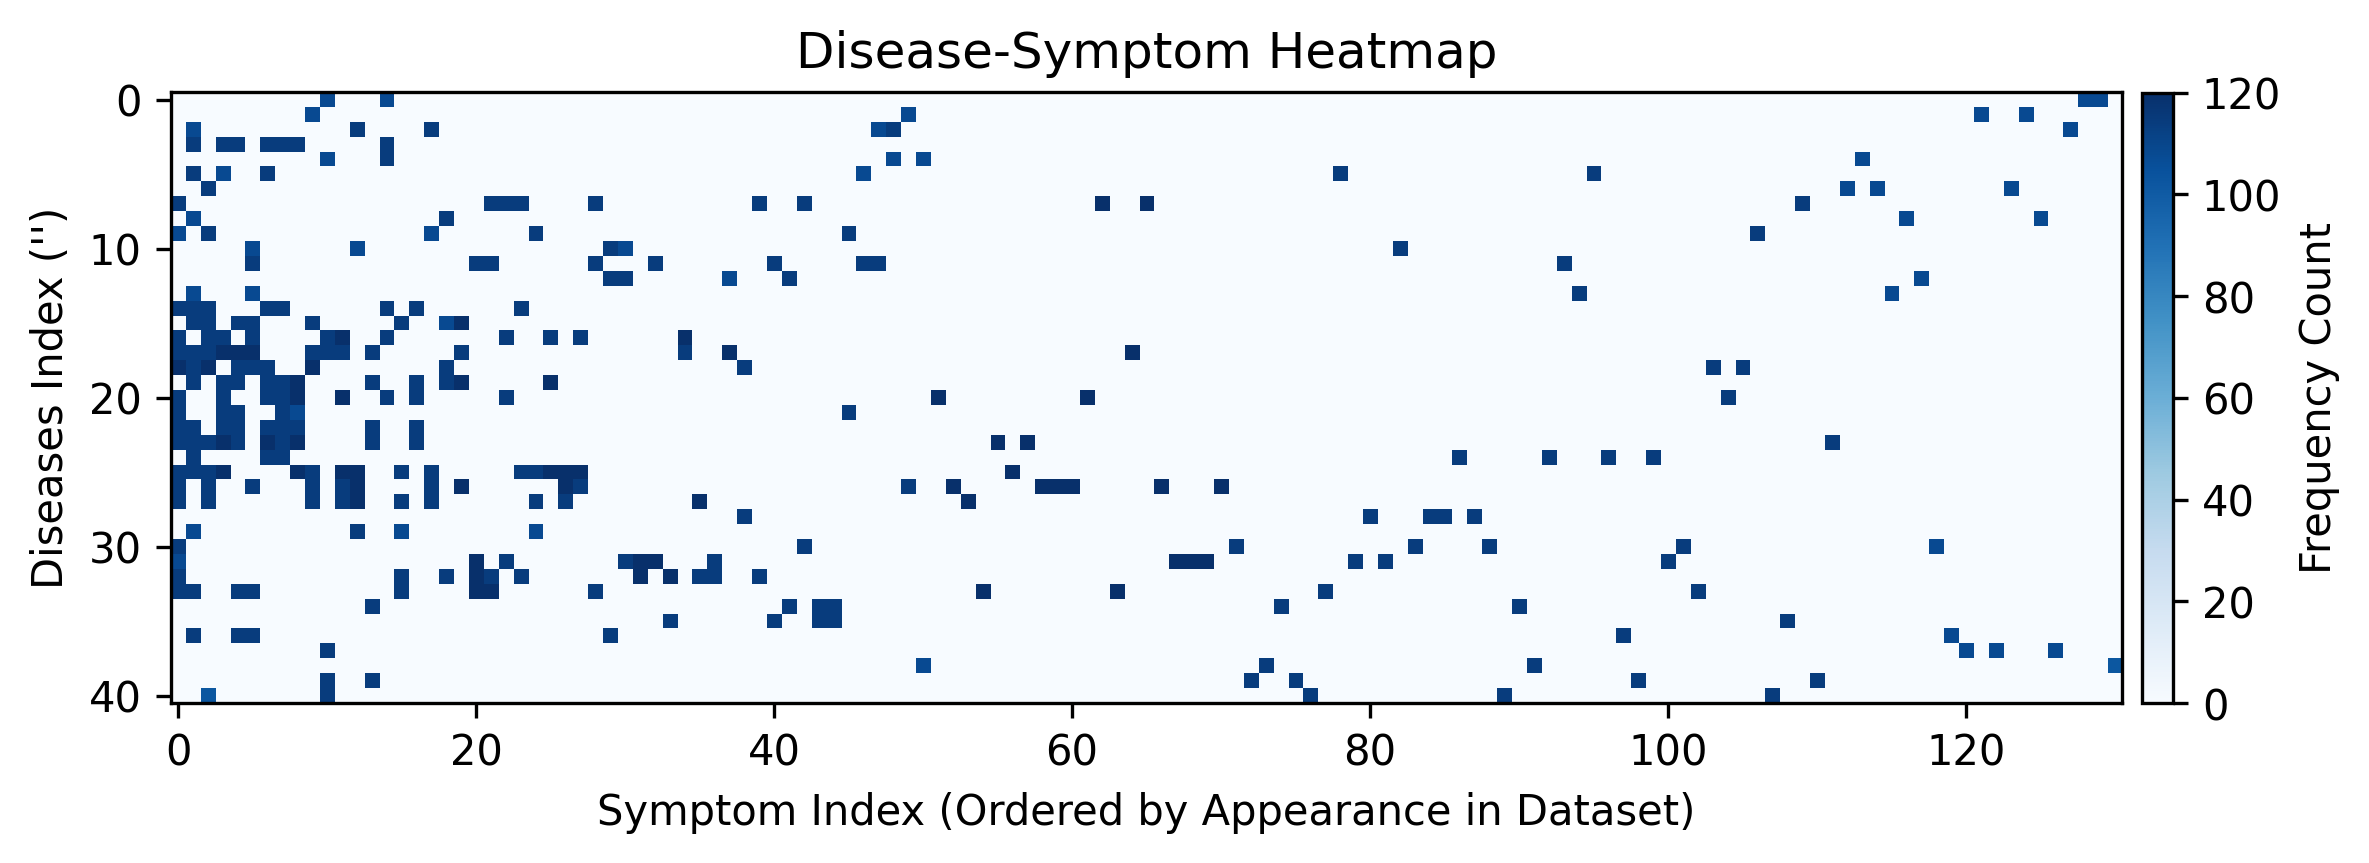

In [111]:
# Convert unique symptoms names to numpy array (first 10)
symptom_unique = symptom_arr.sort_values(ascending = False).index.to_numpy()
# Convert unique disease names to numpy array (first 10)
disease_unique = disease_arr.sort_values(ascending = False).index.to_numpy()

# Create a one-hot encoded DataFrame where rows = diseases, columns = symptoms
dissym_matrix = pd.DataFrame(0, index = disease_unique, columns = symptom_unique)

# Fill the matrix with frequency counts
for _, row in df_Data.iterrows():
    disease = row["Disease"]
    symptoms = row[1:].dropna().values  # Extract symptoms from the row
    dissym_matrix.loc[disease, symptoms] += 1

# print(dissym_matrix)

plt.figure(figsize=(8, 4))
# Plot heatmap
# sb.heatmap(dissym_matrix, annot=False, cmap="Blues", xticklabels = range( 0, len(symptom_unique), 20) )
plt.imshow(dissym_matrix, cmap = "Blues")
# Axis labels
plt.xlabel("Symptom Index (Ordered by Appearance in Dataset)")
plt.ylabel("Diseases Index ('')")
# Colorbar
plt.colorbar(label="Frequency Count", fraction = 0.01525, pad = 0.01)
# Set plot title
plt.title("Disease-Symptom Heatmap")
# Save plot
plt.tight_layout()
plt.savefig("./Plots/Visualizations/heatmap.pdf")
# Show plot
plt.show()
plt.close()

# Only some rows/columns are shown, missing values?

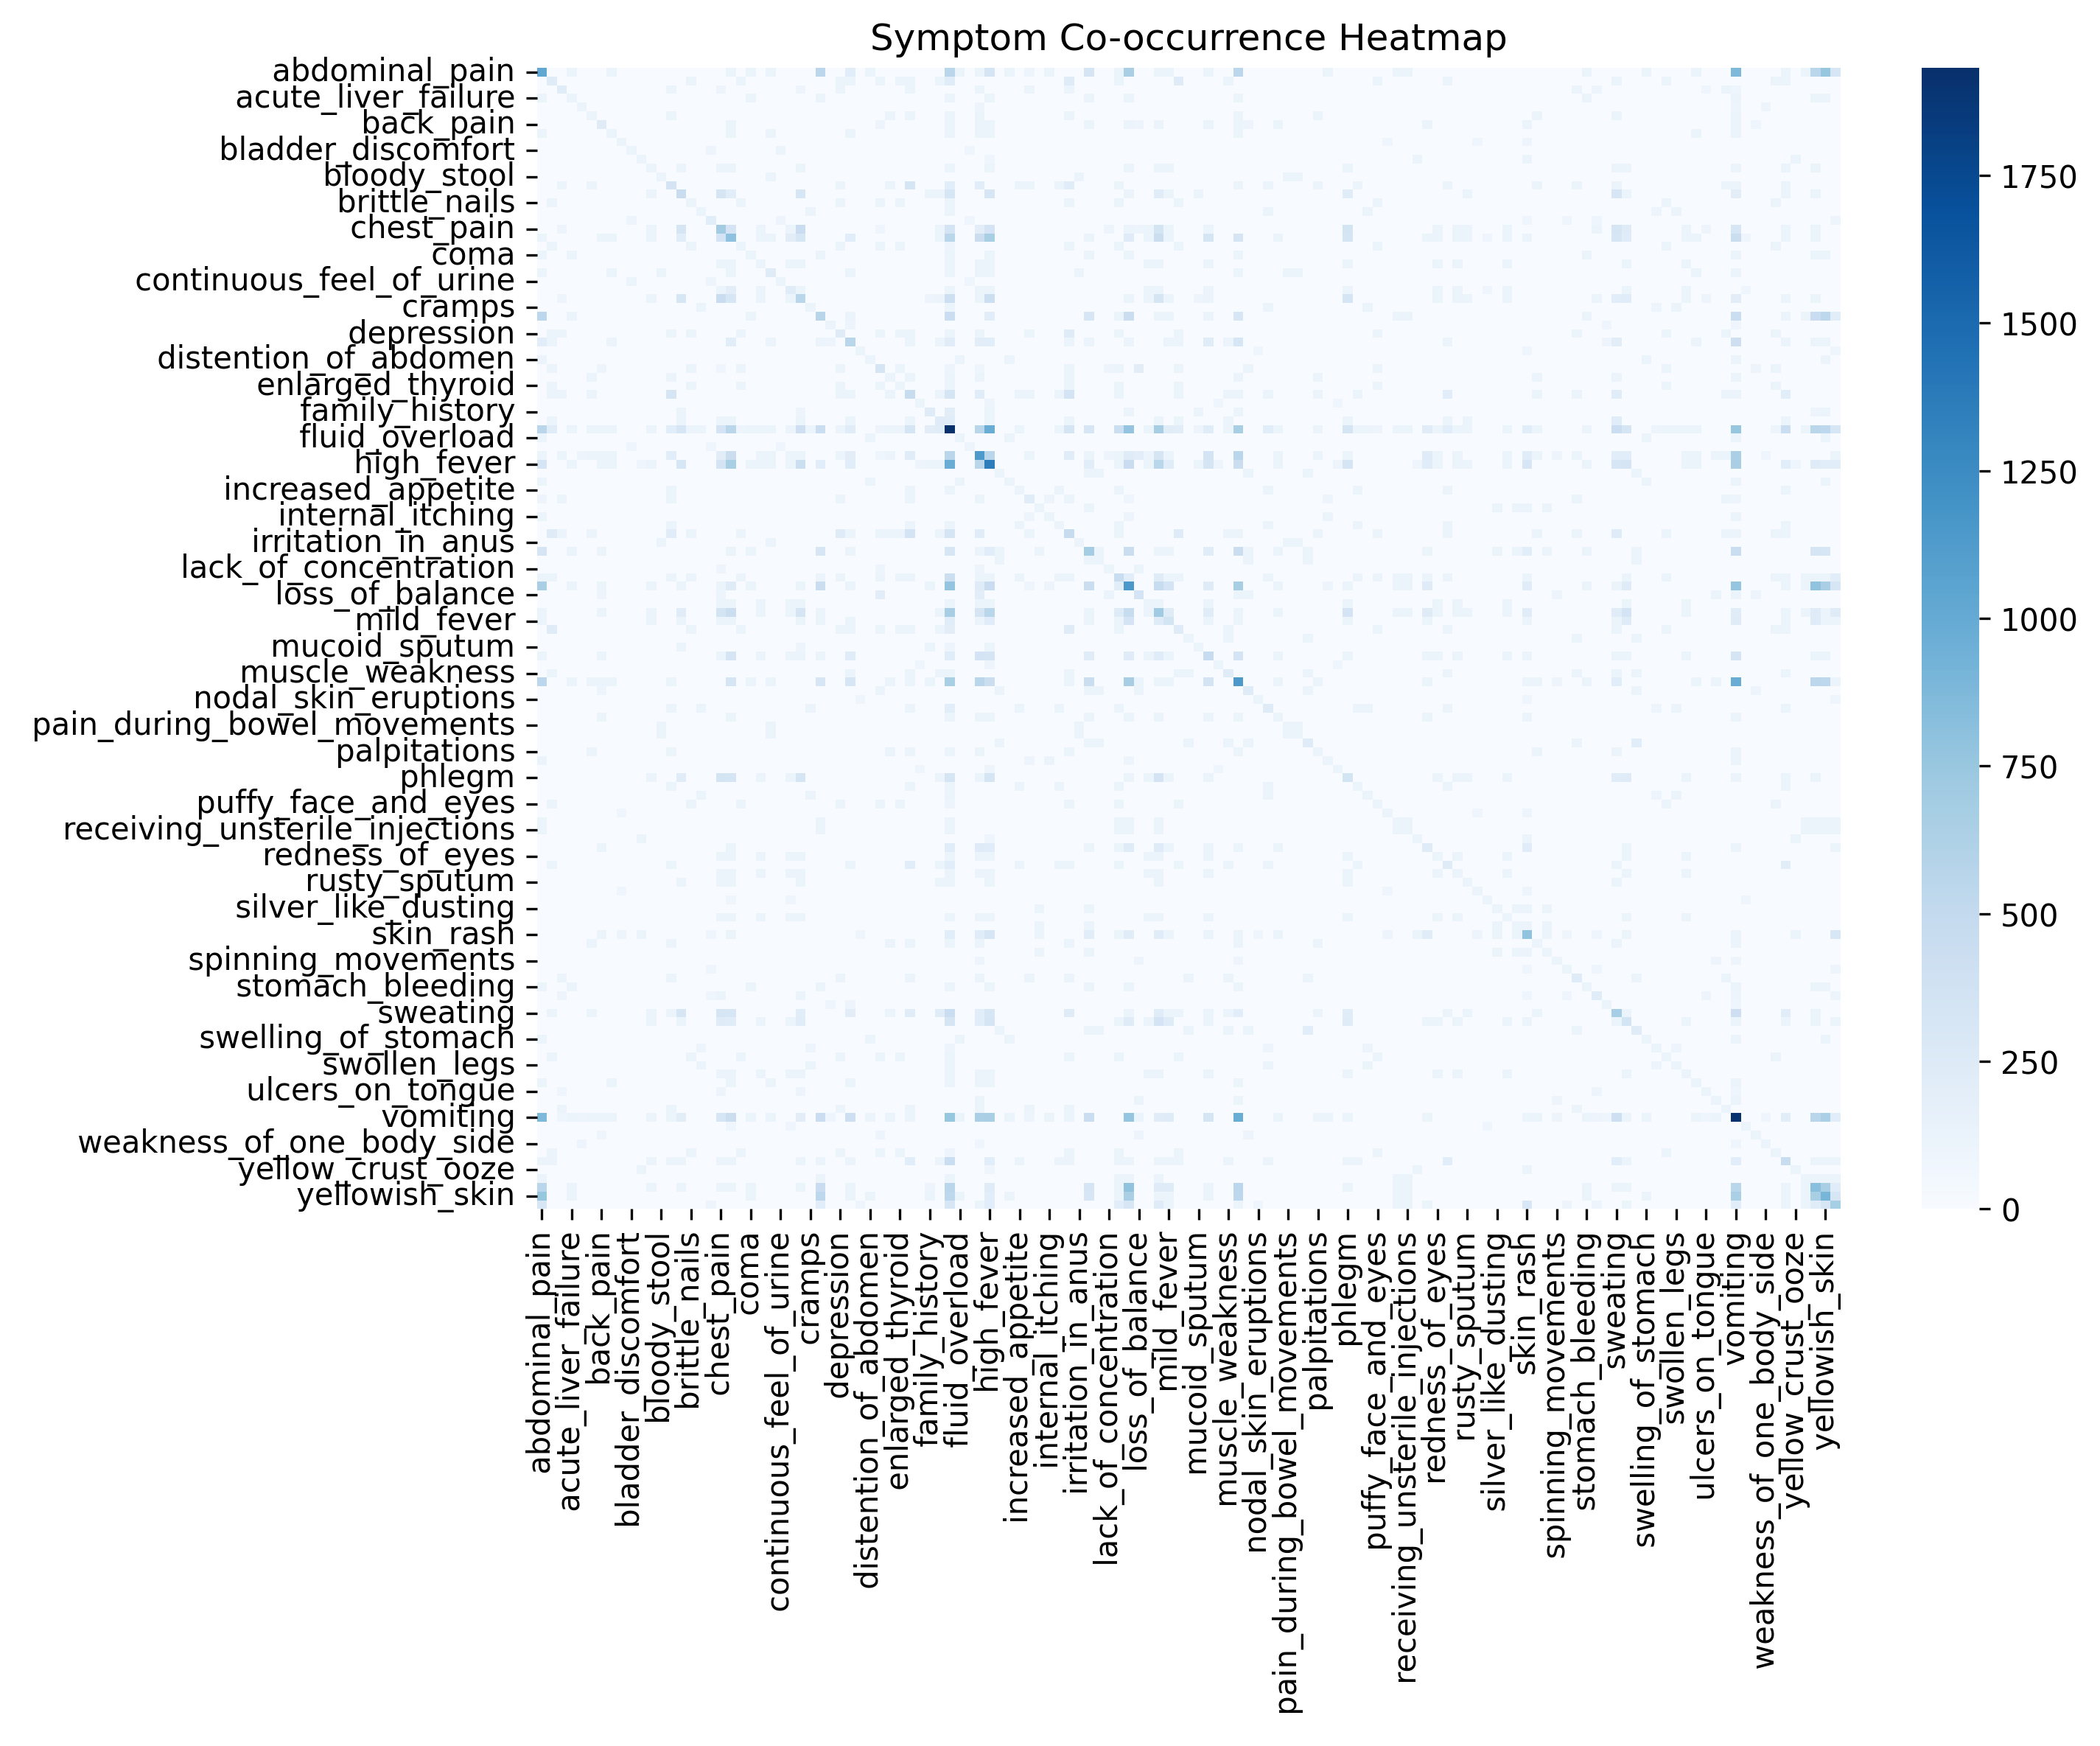

In [80]:
# Convert symptoms to binary format (1 if present, 0 if absent)
symptom_matrix = pd.get_dummies(df_Data.iloc[:, 1:].stack()).groupby(level=0).sum()

# Compute co-occurrence matrix
co_occurrence = symptom_matrix.T.dot(symptom_matrix)

# Set plot parameters
plt.figure(figsize=(10, 8))
# Plot the heatmap
sb.heatmap(co_occurrence, cmap="Blues", annot=False)
# Set title
plt.title("Symptom Co-occurrence Heatmap")
# Save plot
plt.tight_layout()
plt.savefig("./Plots/Visualizations/occurrence.pdf")
# Show plot
plt.show()

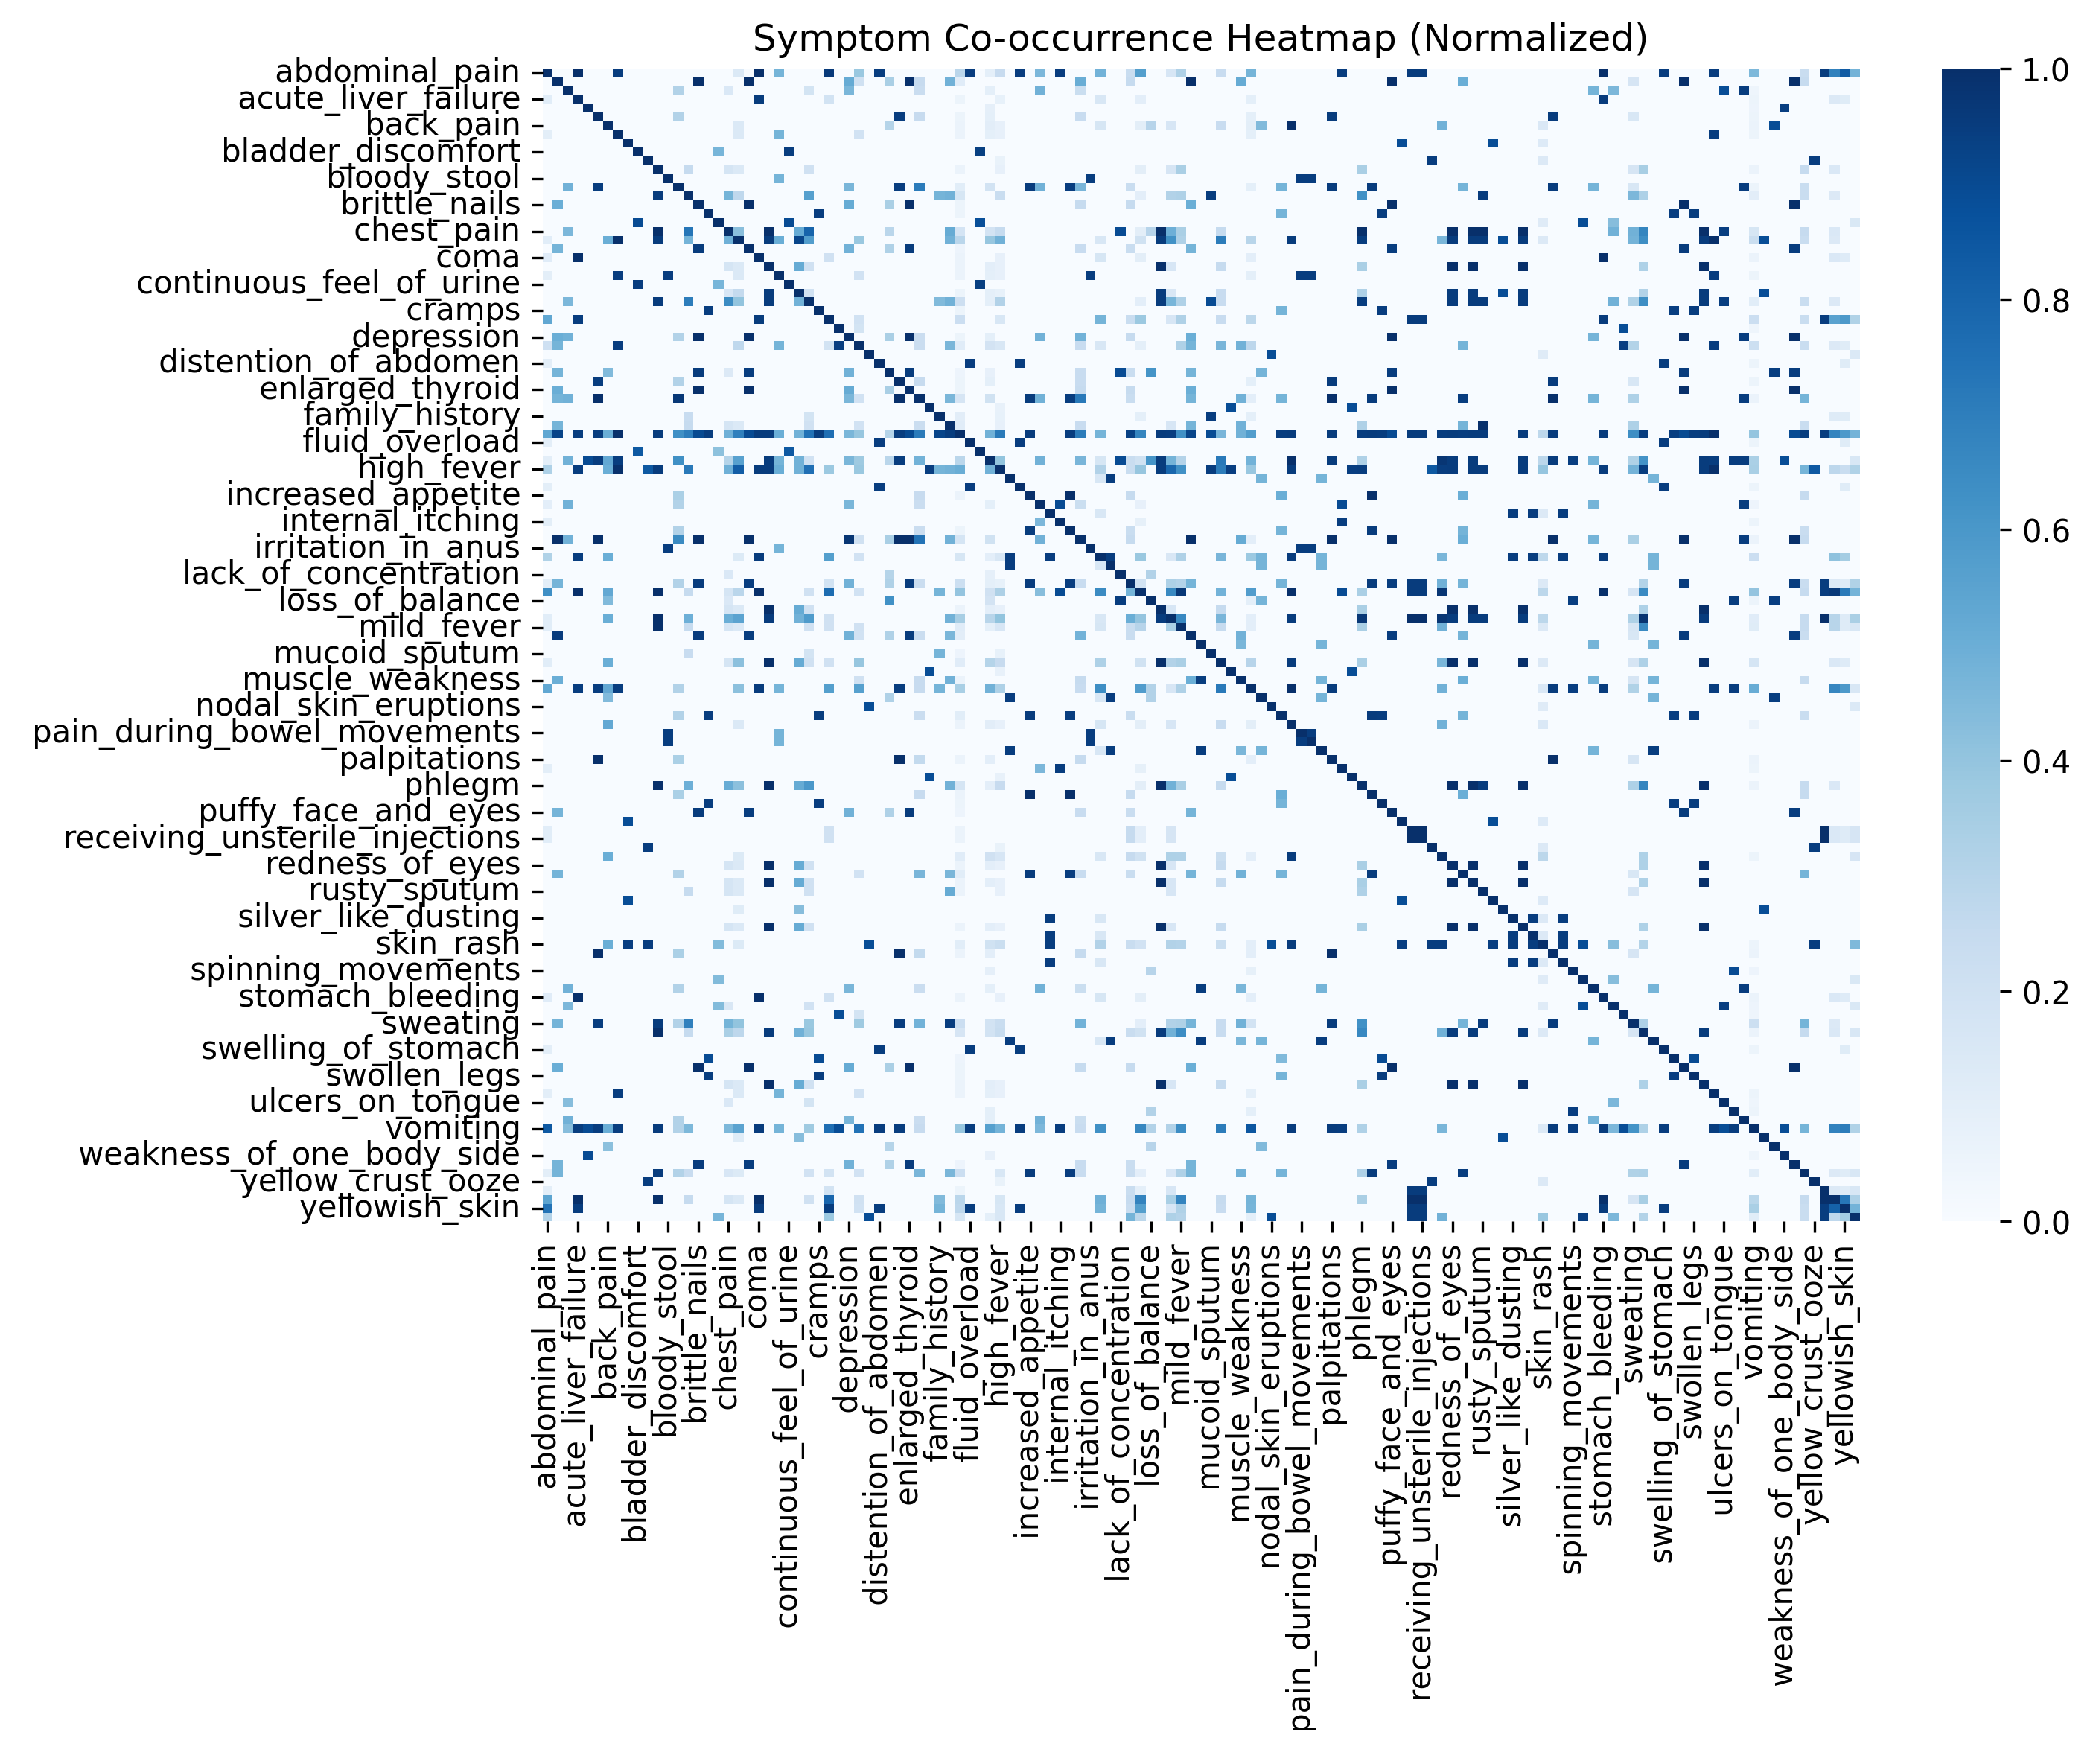

In [81]:
# Normalize co-ocurrence matrix, so that final output in percentages
co_occurrence_norm = co_occurrence / co_occurrence.max() # * 100

# Set plot parameters
plt.figure(figsize=(10, 8))
# Plot the heatmap
sb.heatmap(co_occurrence_norm, cmap="Blues", annot=False)
# Set title
plt.title("Symptom Co-occurrence Heatmap (Normalized)")
# Save figure
plt.tight_layout()
plt.savefig("./Plots/Visualizations/occurrence_norm.pdf")
# Show plot
plt.show()

/var/folders/2z/gg72mtn93pgbw7k8w_rzyr0h0000gn/T/ipykernel_74443/3390622600.py:20: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  top_symptoms = pd.unique(top_N.index.get_level_values(0).tolist() + top_N.index.get_level_values(1).tolist())


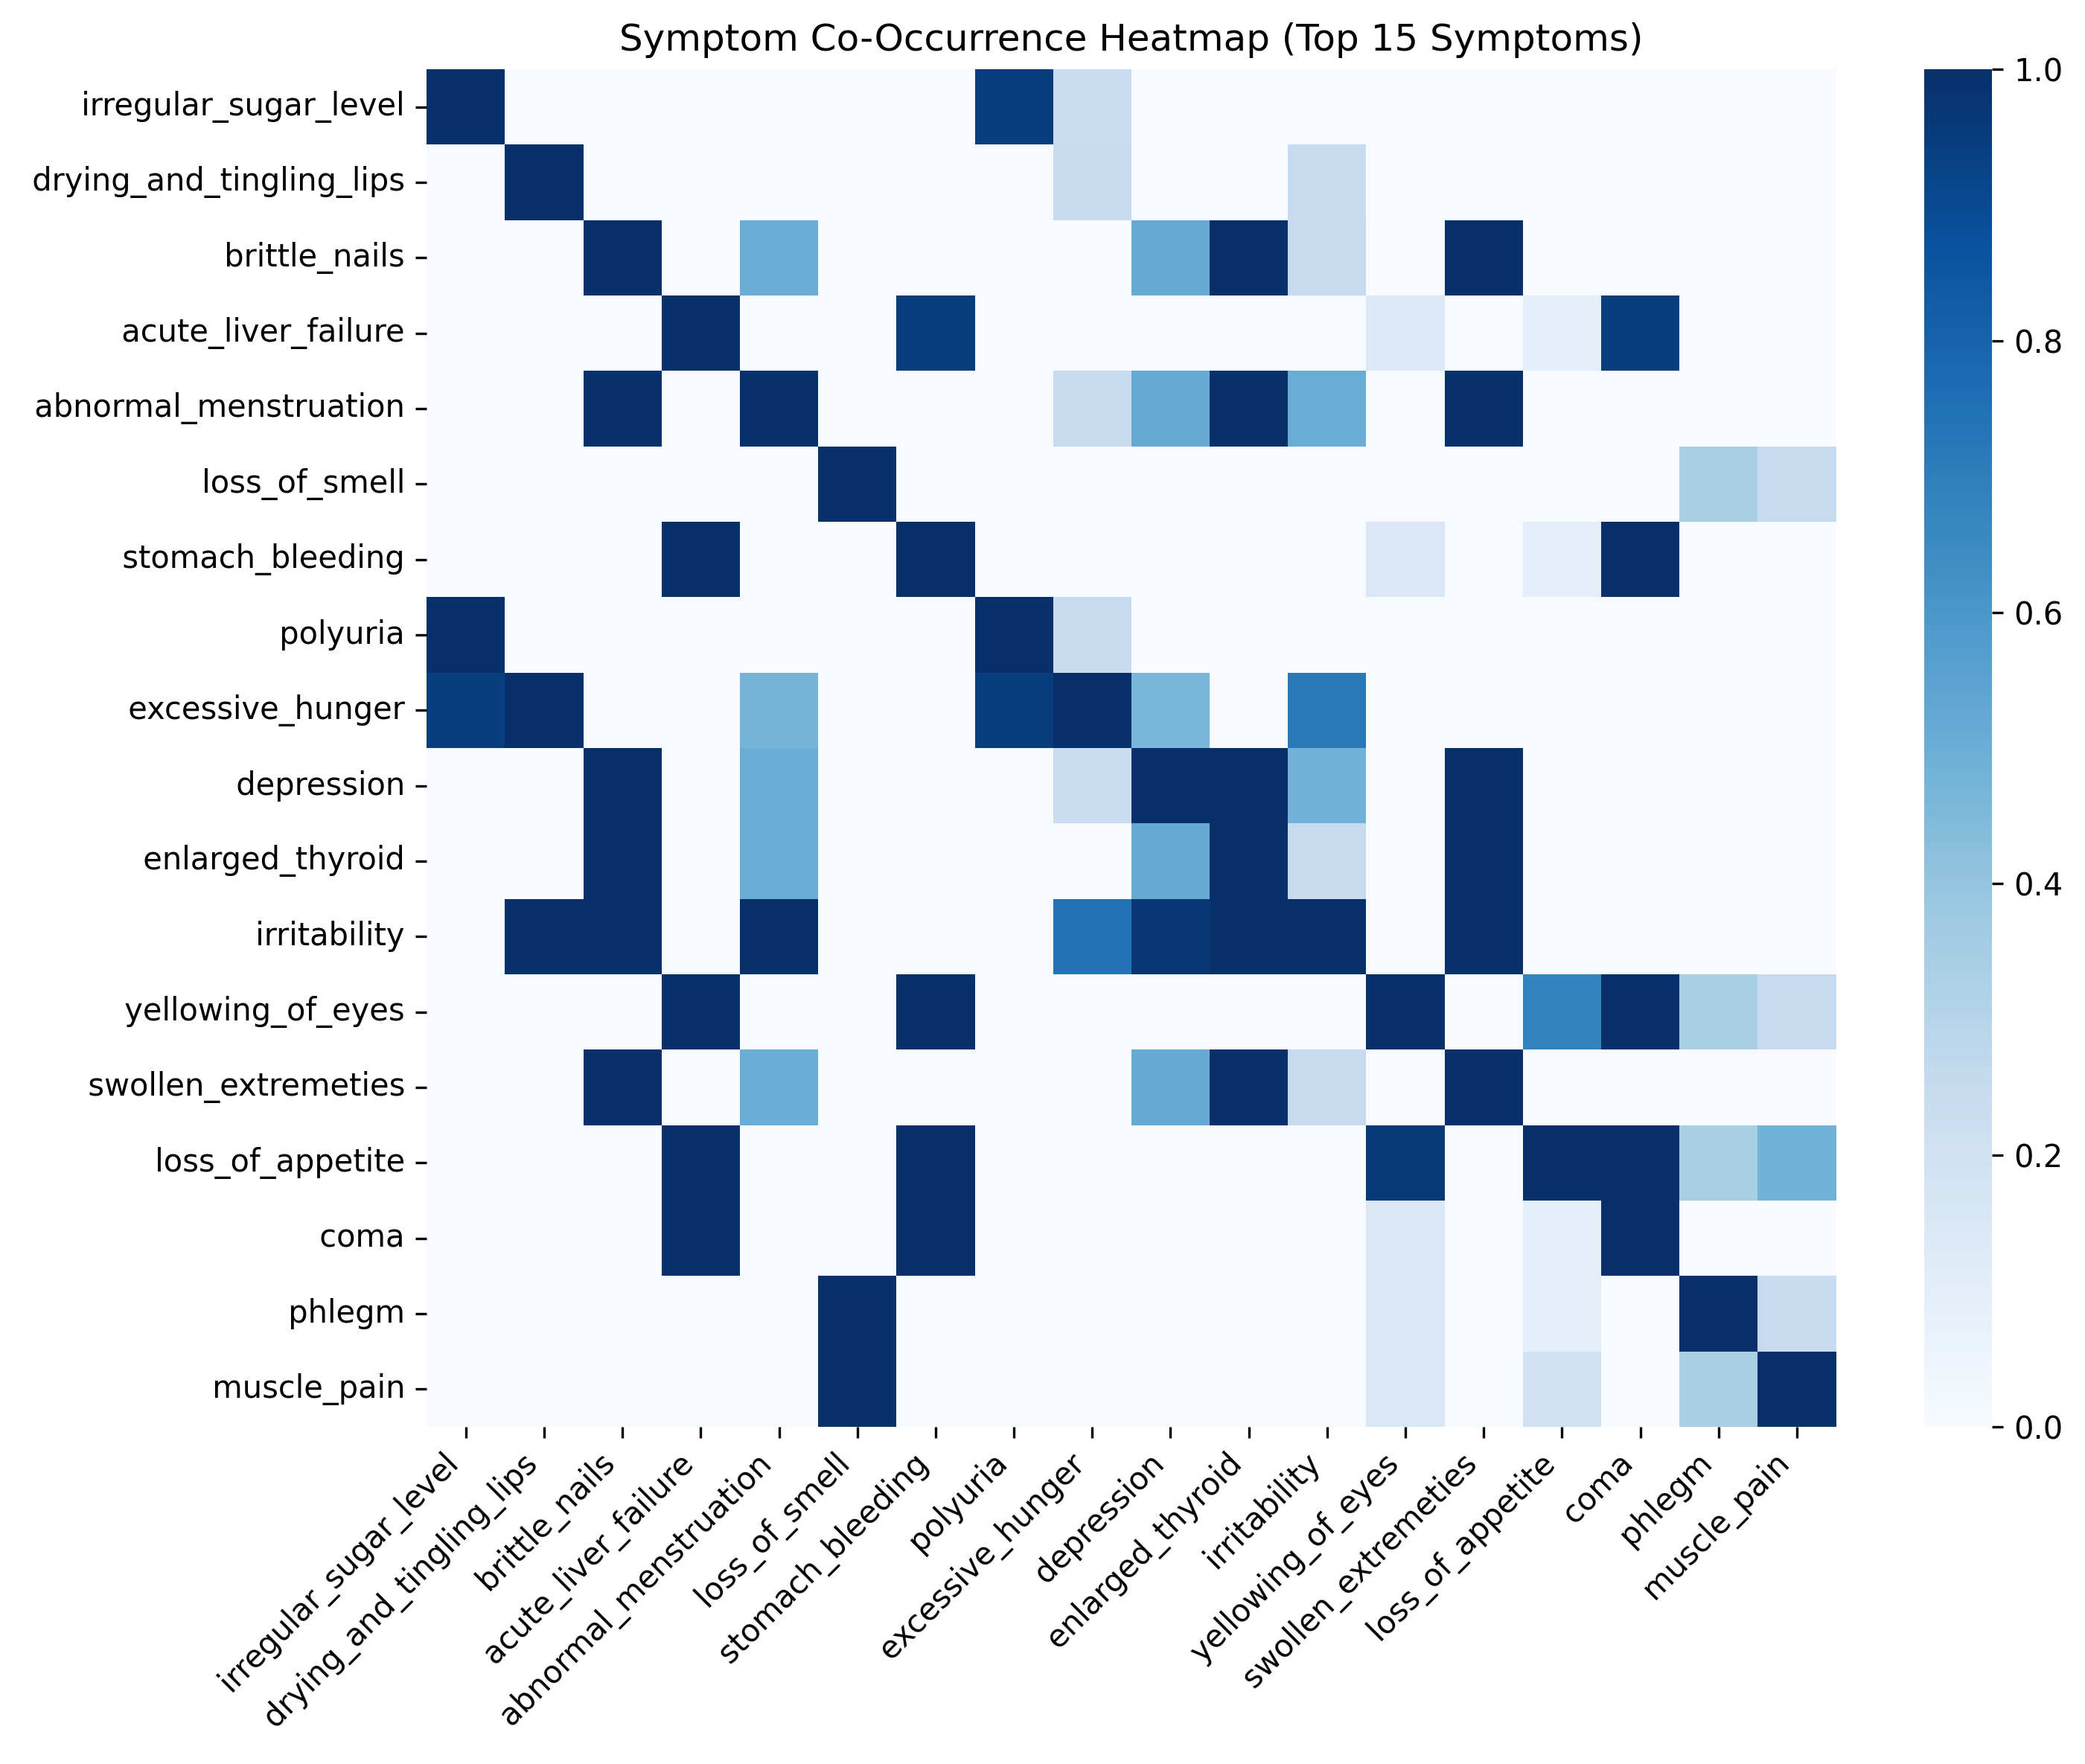

In [82]:
# Choose the top N symptoms that present the most co-occurrence (nonzero entries)
N = 15

# Unstack the matrix to get all pairs
pairs = co_occurrence_norm.unstack()

# Drop duplicate pairs
pairs = pairs[pairs.index.get_level_values(0) < pairs.index.get_level_values(1)]

# Drop zero entries
non_zero_pairs = pairs[pairs > 0]

# Sort by co-occurrence strength descending
sorted_pairs = non_zero_pairs.sort_values(ascending=False)

# Select top N
top_N = sorted_pairs.head(N)

# Get the unique symptoms involved in the top N pairs
top_symptoms = pd.unique(top_N.index.get_level_values(0).tolist() + top_N.index.get_level_values(1).tolist())

# Filter the normalized co-occurrence matrix to only these top symptoms
filtered_matrix = co_occurrence_norm.loc[top_symptoms, top_symptoms]

# Set figure size
plt.figure(figsize=(10, 8))
# Plot heatmap
sb.heatmap(filtered_matrix, cmap='Blues')
# Plot setup
plt.title(f"Symptom Co-Occurrence Heatmap (Top {N} Symptoms)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
# Save plot
plt.tight_layout()
plt.savefig("./Plots/Visualizations/occurrence_norm_15.pdf")
# Show plot
plt.show()

**Missing Data Visualization**

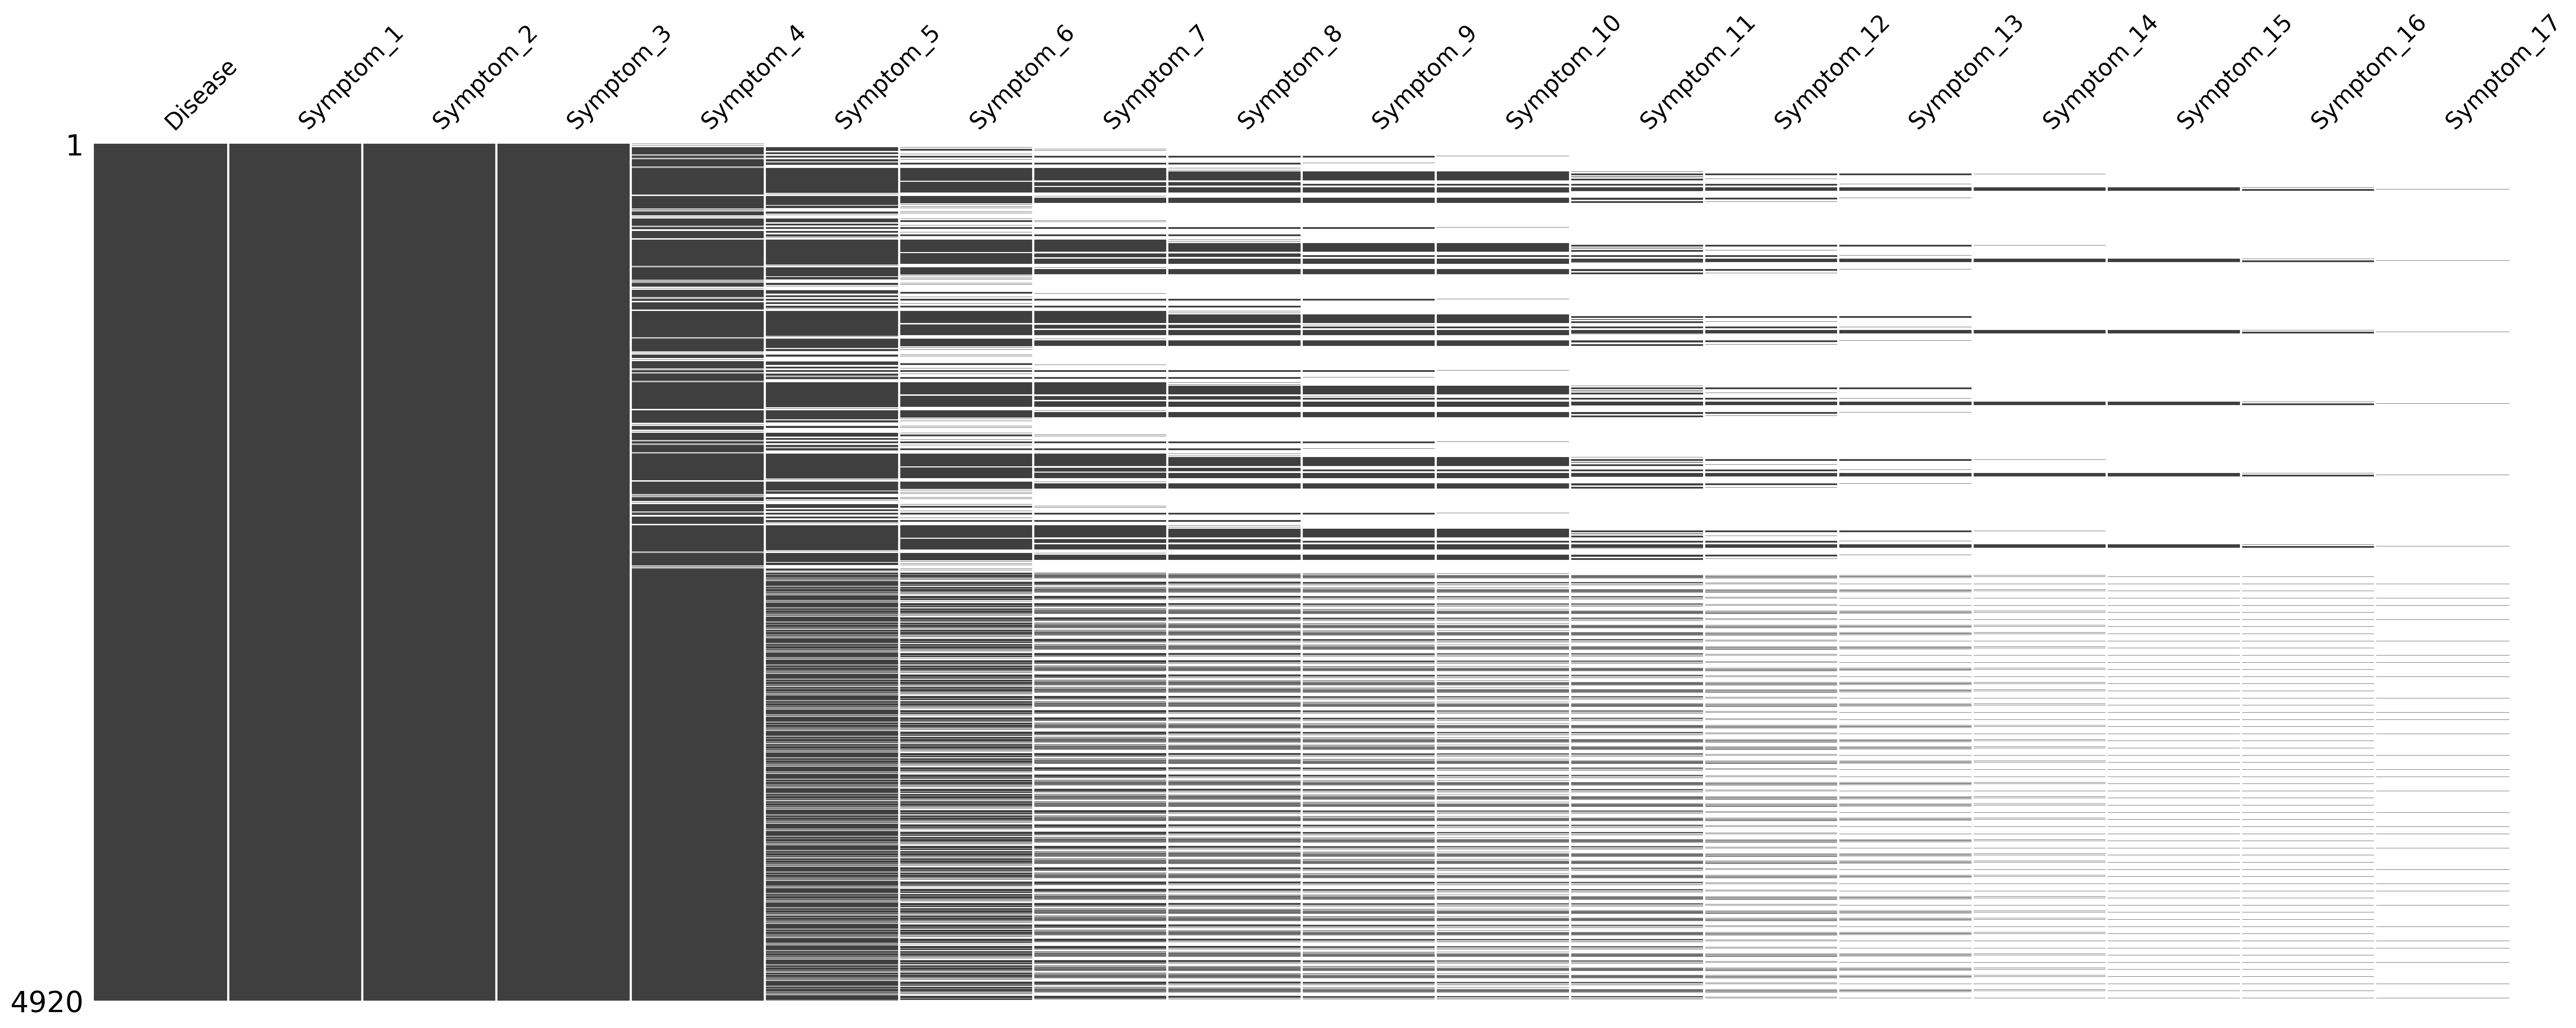

In [83]:
# Compute missing value matrix for the dataset
msno.matrix(df_Data, sparkline = False)
# Save plot
plt.tight_layout()
plt.savefig("./Plots/Visualizations/missing_mat.pdf")
# Plot the graph
plt.show()

**Symptom Weight Distribution**

In [84]:
# Get symptom and associated weight
severity_arr = df_Sev
severity_arr

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5
...,...,...
128,inflammatory_nails,2
129,blister,4
130,red_sore_around_nose,2
131,yellow_crust_ooze,3
